In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import numpy as np
from sklearn.tree import plot_tree
import itertools
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

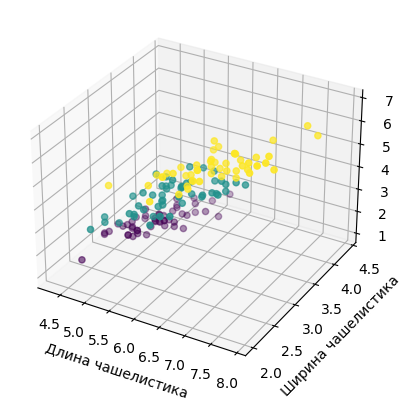

In [2]:
iris = load_iris()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target)
ax.set_xlabel('Длина чашелистика')
ax.set_ylabel('Ширина чашелистика')
ax.set_zlabel('Длина лепестка')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=random.randint(1, 1000))
clf = DecisionTreeClassifier(random_state=random.randint(1, 1000), max_depth=10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy: %.2f" % accuracy)
importances = clf.feature_importances_
for i in range(len(importances)):
    print("Feature %d: %.2f" % (i, importances[i]))

In [ ]:
kmeans = cluster.KMeans(n_clusters=3, random_state=2023)
kmeans.fit(iris.data)
labels = kmeans.labels_
print('Матрица ошибок:')
print(metrics.confusion_matrix(iris.target, labels))
print('Гомогенность:', metrics.homogeneity_score(iris.target, labels))
print('Силуэт:', metrics.silhouette_score(iris.data, labels))

In [ ]:
print('Матрица ошибок (истинные метки):')
print(metrics.confusion_matrix(iris.target, iris.target))

print('Гомогенность (истинные метки):', metrics.homogeneity_score(iris.target, iris.target))
print('Силуэт (истинные метки):', metrics.silhouette_score(iris.data, iris.target))

In [ ]:

random_labels = np.random.randint(3, size=iris.target.shape)

print('Матрица ошибок (случайные метки):')
print(metrics.confusion_matrix(iris.target, random_labels))
print('Метрика гомогенности (предсказанные метки):', metrics.homogeneity_score(iris.target, kmeans.labels_))
print('Метрика гомогенности (истинные метки):', metrics.homogeneity_score(iris.target, iris.target))
print('Метрика гомогенности (случайные метки):', metrics.homogeneity_score(iris.target, random_labels))
print('Метрика силуэта (предсказанные метки):', metrics.silhouette_score(iris.data, kmeans.labels_))
print('Метрика силуэта (истинные метки):', metrics.silhouette_score(iris.data, iris.target))
print('Метрика силуэта (случайные метки):', metrics.silhouette_score(iris.data, random_labels))

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X=iris.data, y=kmeans.labels_)
fig = plt.figure(figsize=(8, 5))
plot_tree(tree, filled=True)
plt.show()

In [ ]:
iris = load_iris()
X = iris.data
k_range = range(2, 16)
silhouette_scores = []
homogeneity_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2023)
    kmeans.fit(X)
    
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    homogeneity_scores.append(homogeneity_score(iris.target, kmeans.labels_))
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(k_range, silhouette_scores, 'bo-')
ax[0].set_title('Silhouette score vs. number of clusters')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette score')
ax[1].plot(k_range, homogeneity_scores, 'go-')
ax[1].set_title('Homogeneity score vs. number of clusters')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Homogeneity score')
plt.show()

In [ ]:
iris = load_iris()
def dbscan_clustering(eps, min_samples, metric):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(iris.data)
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return num_clusters, labels
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [2, 3, 4, 5]
metrics = ['cosine', 'euclidean', 'manhattan']
for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            num_clusters, labels = dbscan_clustering(eps, min_samples, metric)
            if num_clusters == 3:
                print(f"DBSCAN with eps={eps}, min_samples={min_samples}, metric={metric} produces correct number of clusters")
            h_score = homogeneity_score(iris.target, labels)
            print(f'eps={eps}, min_samples={min_samples}, metric={metric}, num_clusters={num_clusters}, homogeneity score={h_score:.3f}')

In [ ]:
def get_num_clusters(eps, min_samples, metric):
    iris = load_iris()
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(iris.data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = range(2, 6)
distance_metrics = ['cosine', 'euclidean', 'manhattan']
results = pd.DataFrame(columns=['eps', 'min_samples', 'metric', 'n_clusters'])
for eps in eps_range:
    for min_samples in min_samples_range:
        for metric in distance_metrics:
            n_clusters = get_num_clusters(eps, min_samples, metric)
            results = results.append({'eps': eps, 'min_samples': min_samples, 'metric': metric, 'n_clusters': n_clusters}, ignore_index=True)
sns.set_style('darkgrid')
g = sns.FacetGrid(results, col='metric', hue='metric', col_wrap=3, height=4)
g.map(sns.lineplot, 'eps', 'n_clusters', 'min_samples')
g.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


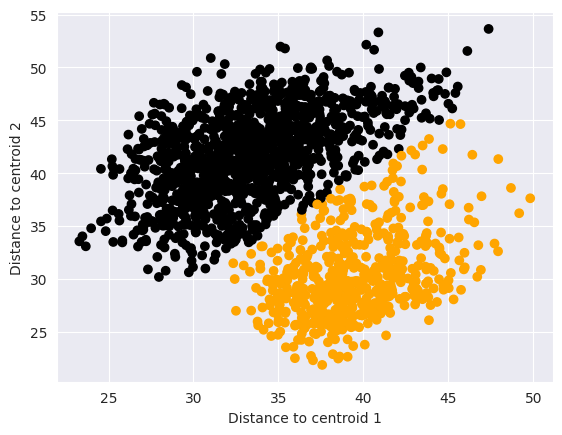

In [11]:
plt.figure()
digits = load_digits()
kmeans = KMeans(n_clusters=2, random_state=2023)
clusters = kmeans.fit_predict(digits.data)
centroids = kmeans.cluster_centers_
colors = ['red' if cluster == 0 else 'blue' for cluster in clusters]
distances = kmeans.transform(digits.data)
plt.scatter(distances[:, 0], distances[:, 1], c=np.where(clusters==0, 'black', 'orange'))
plt.xlabel('Distance to centroid 1')
plt.ylabel('Distance to centroid 2')
plt.show()

Ближайшие точки к центроидам:
[array([652, 104]), array([558, 117])]
Аномальные точки:
[   0    1    2 ... 1794 1795 1796]


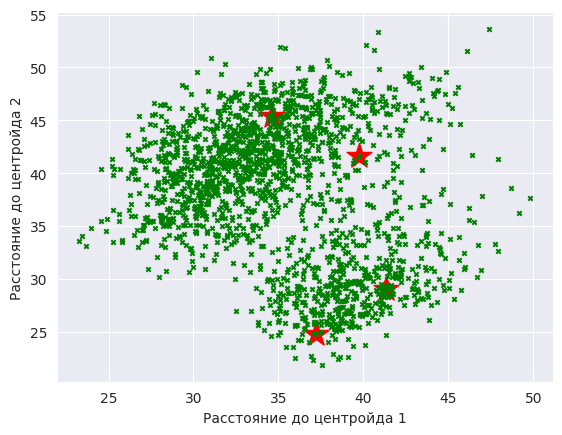

In [12]:
closest_points = [np.argmin(distances[clusters == i, :], axis=0) for i in range(kmeans.n_clusters)]
threshold = 10
anomaly_indices = np.where(np.max(distances, axis=1) > threshold)[0]
anomaly_points = digits.data[anomaly_indices]
print('Ближайшие точки к центроидам:\n{}'.format(closest_points))
print('Аномальные точки:\n{}'.format(anomaly_indices))
plt.scatter(distances[closest_points, 0], distances[closest_points, 1], marker='*', s=350, color='red')
plt.scatter(distances[anomaly_indices, 0], distances[anomaly_indices, 1], marker='x', s=10, color='green')
plt.xlabel('Расстояние до центройда 1')
plt.ylabel('Расстояние до центройда 2')
plt.show()

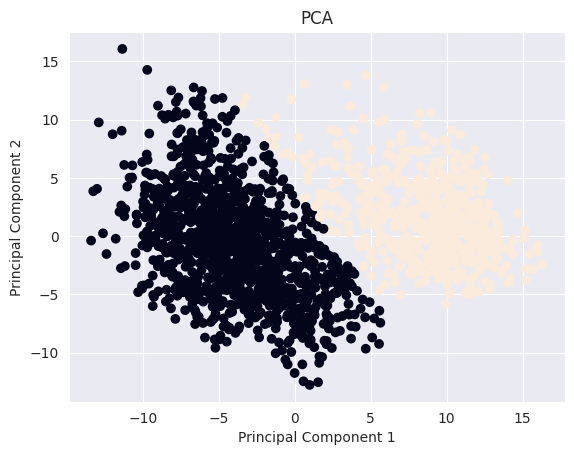

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

pca = PCA(n_components=2)
distances_2d = pca.fit_transform(distances)

ax.scatter(distances_2d[:, 0], distances_2d[:, 1], c=clusters)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA')

plt.show()

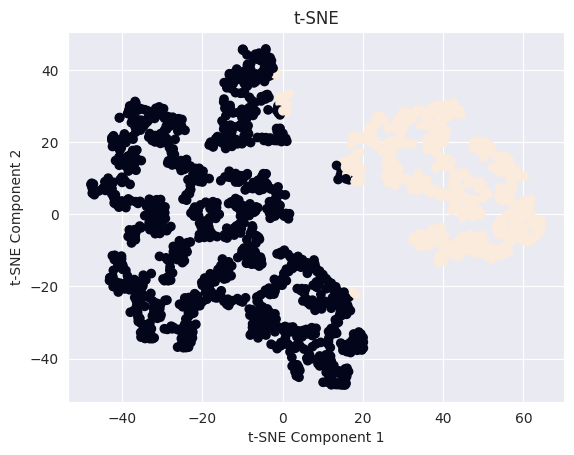

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
distances_2d = tsne.fit_transform(distances)

ax.scatter(distances_2d[:, 0], distances_2d[:, 1], c=clusters)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE')

plt.show()

In [15]:
for epsilon in np.arange(0.5, 1.6, 0.1):
    dbscan = DBSCAN(eps=epsilon, min_samples=2)
    clusters = dbscan.fit_predict(digits.data)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = np.count_nonzero(clusters == -1)
    print(f"epsilon: {epsilon:.1f}, clusters: {n_clusters}, noise: {n_noise}")

epsilon: 0.5, clusters: 0, noise: 1797
epsilon: 0.6, clusters: 0, noise: 1797
epsilon: 0.7, clusters: 0, noise: 1797
epsilon: 0.8, clusters: 0, noise: 1797
epsilon: 0.9, clusters: 0, noise: 1797
epsilon: 1.0, clusters: 0, noise: 1797
epsilon: 1.1, clusters: 0, noise: 1797
epsilon: 1.2, clusters: 0, noise: 1797
epsilon: 1.3, clusters: 0, noise: 1797
epsilon: 1.4, clusters: 0, noise: 1797
epsilon: 1.5, clusters: 0, noise: 1797


In [16]:
for epsilon in np.arange(0.1, 1.6, 0.1):
    dbscan = DBSCAN(eps=epsilon, min_samples=2)
    clusters = dbscan.fit_predict(X.data)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    print(f"eps: {epsilon:.1f}, clusters: {n_clusters}, noise: {n_noise}")

eps: 0.1, clusters: 4, noise: 142
eps: 0.2, clusters: 19, noise: 89
eps: 0.3, clusters: 21, noise: 43
eps: 0.4, clusters: 7, noise: 16
eps: 0.5, clusters: 6, noise: 6
eps: 0.6, clusters: 4, noise: 3
eps: 0.7, clusters: 3, noise: 1
eps: 0.8, clusters: 3, noise: 0
eps: 0.9, clusters: 2, noise: 0
eps: 1.0, clusters: 2, noise: 0
eps: 1.1, clusters: 2, noise: 0
eps: 1.2, clusters: 2, noise: 0
eps: 1.3, clusters: 2, noise: 0
eps: 1.4, clusters: 2, noise: 0
eps: 1.5, clusters: 2, noise: 0
